In [2]:
import kwant
import numpy as np
import tinyarray as tiny
from types import SimpleNamespace
import scipy.sparse.linalg as la
from matplotlib import pyplot as plt
import holoviews as hv
hv.extension('matplotlib', logo=False) #BOKEH DOESNT SUPPORT LATEX IN LABELS
from holoviews import opts
hv.output(fig='svg')

# define the Pauli matrices
s_0 = np.identity(2)
s_z = np.array([[1, 0], [0, -1]])
s_x = np.array([[0, 1], [1, 0]])
s_y = np.array([[0, -1j], [1j, 0]])
# pauli = [sx,sy,sz] #pauli = {'x':sx, 'y':sy, 'z':sz} #as dictionary

C:\ProgramData\Anaconda3\envs\lps\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [3]:
a=1
t=1.0
W=10
L=30
L_well=10

lat = kwant.lattice.square(a)
syst = kwant.Builder()

#### Define the scattering region. ####
# Potential profile
def potential(site, pot):
    (x, y) = site.pos
    if (L - L_well) / 2 < x < (L + L_well) / 2:
        return pot
    else:
        return 0

def onsite(site, pot):
    return 4 * t + potential(site, pot)

syst[(lat(x, y) for x in range(L) for y in range(W))] = onsite
syst[lat.neighbors()] = -t

#### Define and attach the leads. ####
lead = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))
lead[(lat(0, j) for j in range(W))] = 4 * t
lead[lat.neighbors()] = -t
syst.attach_lead(lead)
syst.attach_lead(lead.reversed())
kwant.plot(syst)

[]

In [10]:
syst=syst.finalized()


In [24]:
def plot_conductance(syst, energy, welldepths):

    # Compute conductance
    data = []
    for welldepth in welldepths:
        pars =dict(pot=-welldepth)
        smatrix = kwant.smatrix(syst, energy, params=pars)
        data.append(smatrix.transmission(1, 0))

    plt.figure()
    plt.plot(welldepths, data)
    plt.xlabel("well depth [t]")
    plt.ylabel("conductance [e^2/h]")
    plt.show()


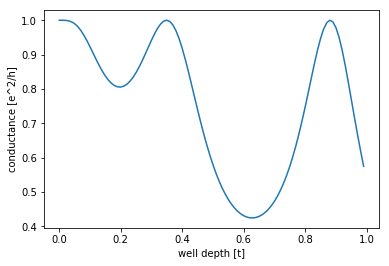

In [25]:
plot_conductance(syst, energy=0.2,
                     welldepths=[0.01 * i for i in range(100)])